<a href="https://colab.research.google.com/github/barrosm/DeepLearningExamples/blob/master/pretreinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

Using TensorFlow backend.


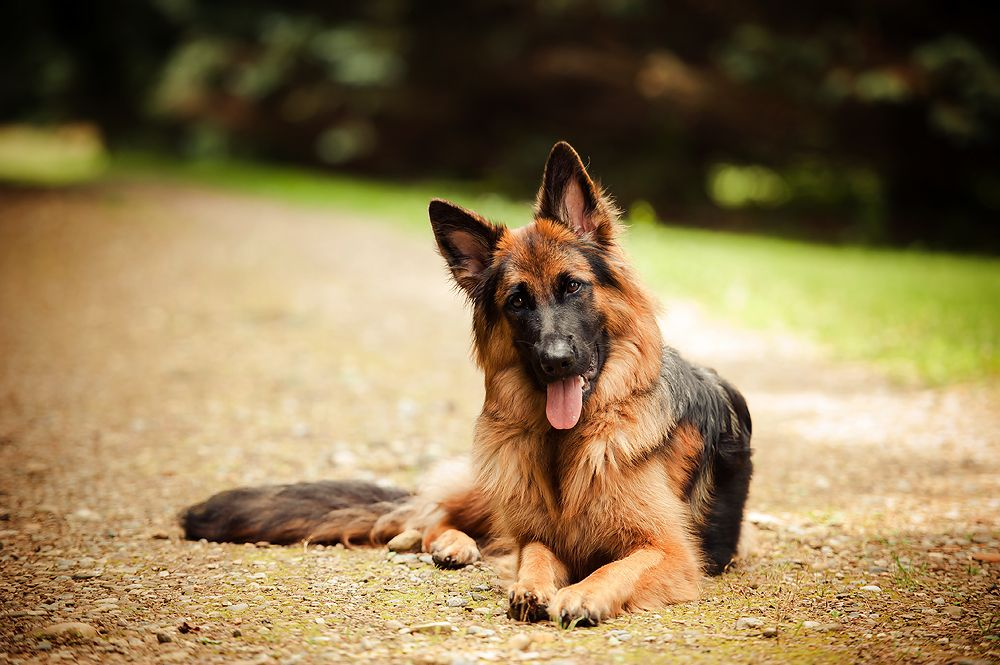

In [6]:
def prepare_image(file):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0) # (1, 224, 224)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Image(filename='perro1.jpg') 

# Load mobilenet model

In [7]:
# Aqui é que eu chamo a rede mobilenet pronta
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


# Inference

In [9]:
preprocessed_image = prepare_image('perro1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 0us/step


[[('n02106662', 'German_shepherd', 0.9698127),
  ('n02105162', 'malinois', 0.010457124),
  ('n02116738', 'African_hunting_dog', 0.00481762),
  ('n02120505', 'grey_fox', 0.004307188),
  ('n01877812', 'wallaby', 0.0040275455)]]

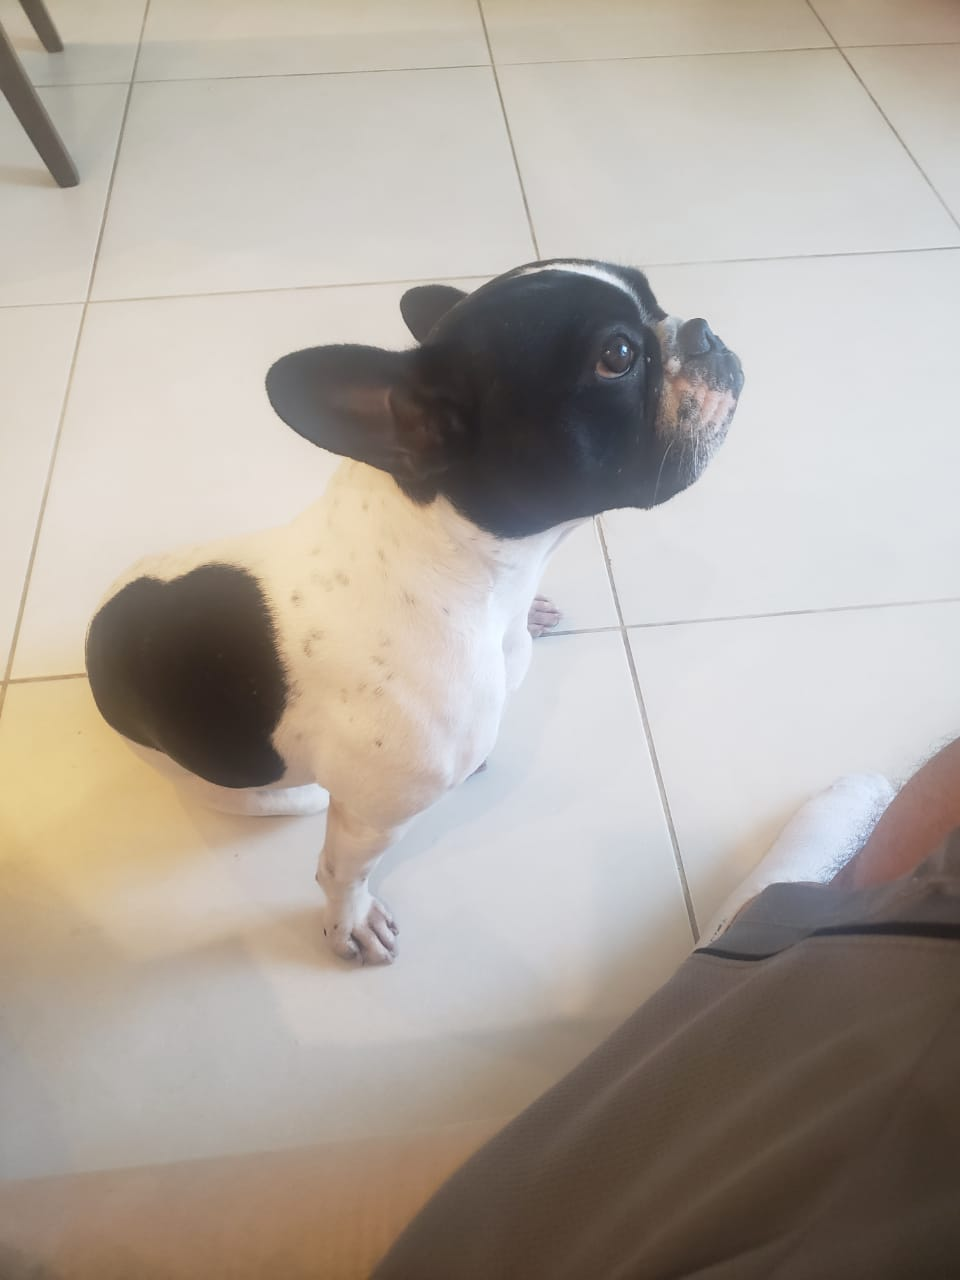

In [10]:
# Fazendo a mesma coisa para outro cachorro
def prepare_image(file):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0) # (1, 224, 224)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Image(filename='perro2.jpg') 

In [11]:
# Inferencia
preprocessed_image = prepare_image('perro2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02108915', 'French_bulldog', 0.9327281),
  ('n02085620', 'Chihuahua', 0.02516287),
  ('n02096585', 'Boston_bull', 0.008222751),
  ('n03935335', 'piggy_bank', 0.007858051),
  ('n02087046', 'toy_terrier', 0.0035781744)]]

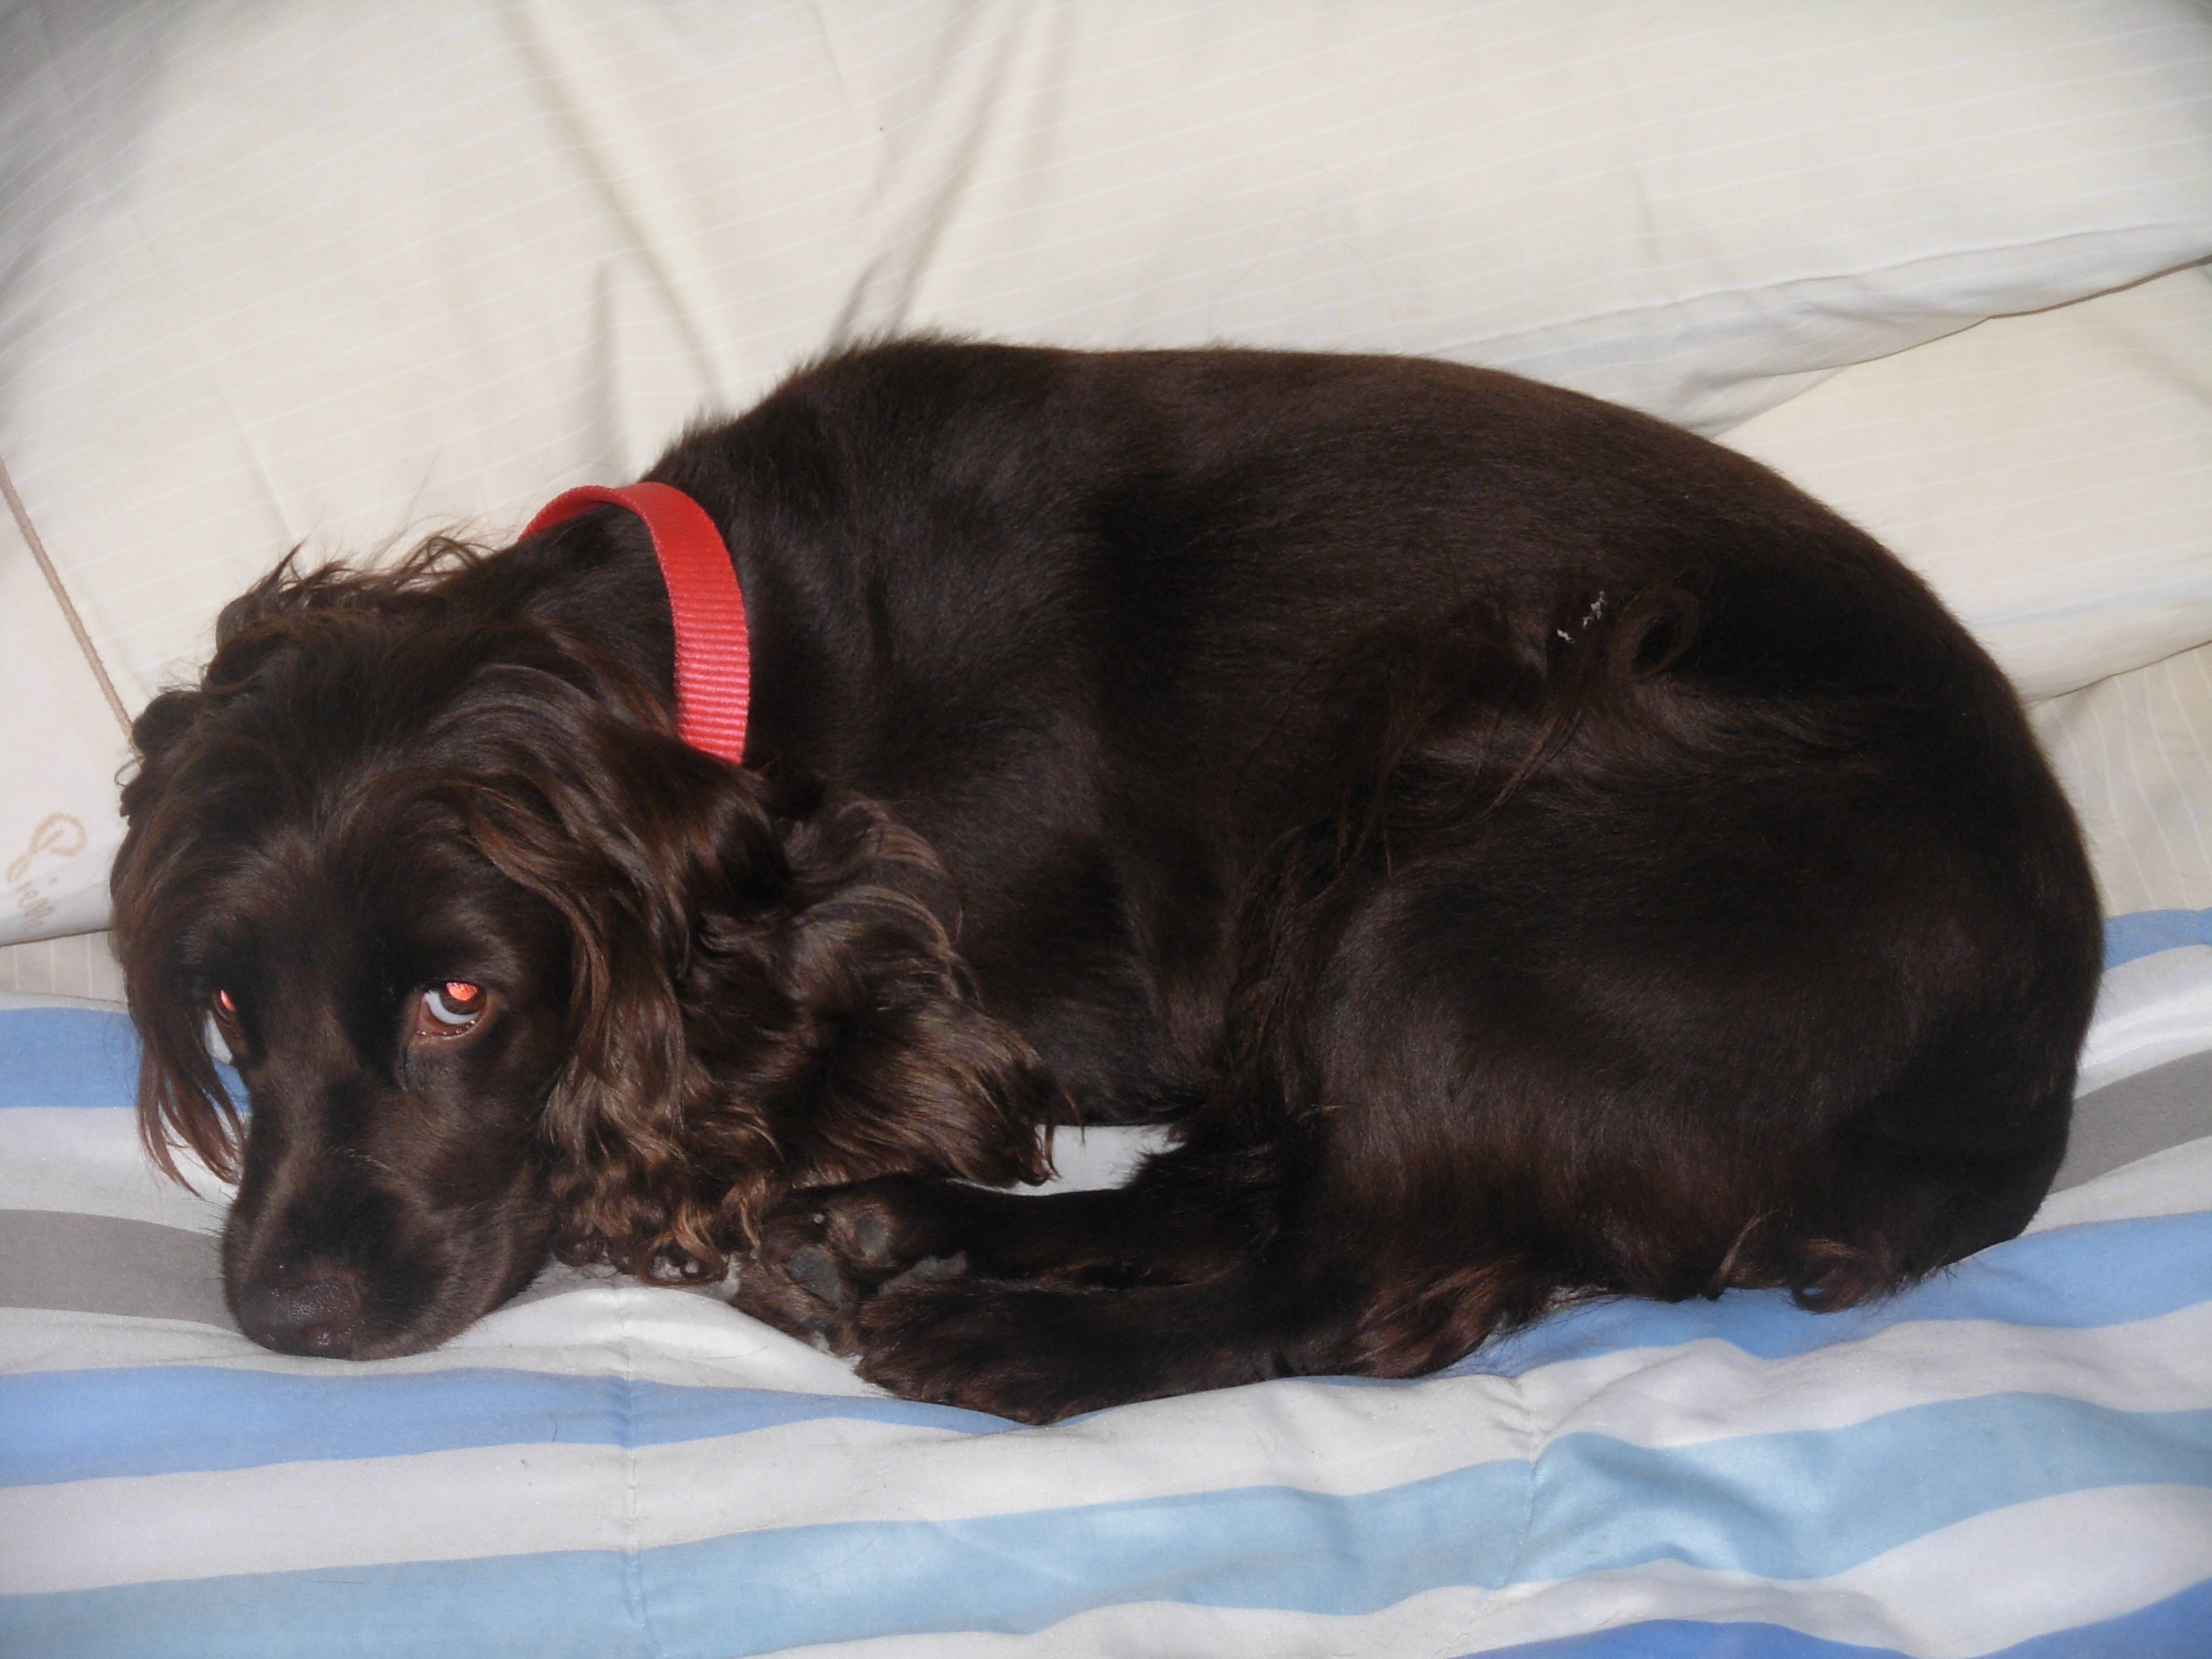

In [12]:
# Mais uma, agora a foto da coisa mais linda do mundo....
def prepare_image(file):
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0) # (1, 224, 224)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Image(filename='2012-04-17 14.07.30.jpg') 

In [13]:
# Inferencia
preprocessed_image = prepare_image('2012-04-17 14.07.30.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02099267', 'flat-coated_retriever', 0.7890845),
  ('n02102318', 'cocker_spaniel', 0.1268969),
  ('n02105056', 'groenendael', 0.020076014),
  ('n02099712', 'Labrador_retriever', 0.012965857),
  ('n02102040', 'English_springer', 0.01144749)]]